In [19]:
import pandas as pd
df = pd.read_csv('salaries.csv')
df.head()

,company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [20]:
inputs = df.drop('salary_more_than_100k', axis='columns')
target = df['salary_more_than_100k']

In [21]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree= LabelEncoder()

In [22]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_company.fit_transform(inputs['job'])
inputs['degree_n'] = le_company.fit_transform(inputs['degree'])
inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [23]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs_n, target, train_size=0.9)

In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [26]:
model.score(X_test, y_test)

0.5

In [27]:
model.predict([[2,2,2]])

array([1], dtype=int64)

In [28]:
model.predict([[2,0,1]])

array([1], dtype=int64)

In [29]:
from sklearn.datasets import load_digits
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

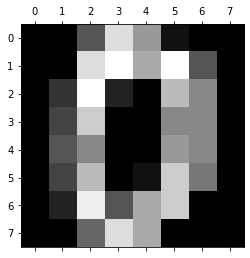

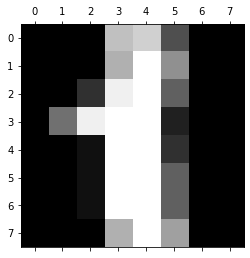

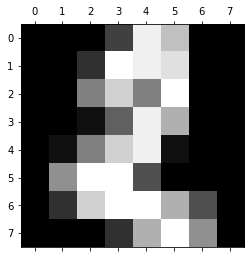

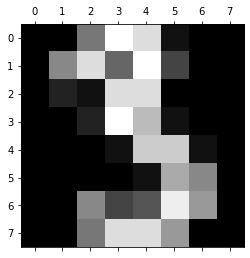

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [31]:
digits_df = pd.DataFrame(digits.data)
digits_df['target'] = digits.target

In [38]:
digit_X_train, digit_X_test, digit_y_train, digit_y_test = train_test_split(digits_df.drop(['target'], axis='columns'),digits_df['target'],  train_size=0.8)

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(digit_X_train, digit_y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
model.score(digit_X_test, digit_y_test)

0.9666666666666667

In [50]:
digit_y_predicted = model.predict(digit_X_test)

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(digit_y_test, digit_y_predicted)
cm

array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 42,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0, 31,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 39,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0],
       [ 0,  2,  0,  1,  1,  1,  0,  1, 38,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 37]], dtype=int64)

Text(69.0, 0.5, 'Truth')

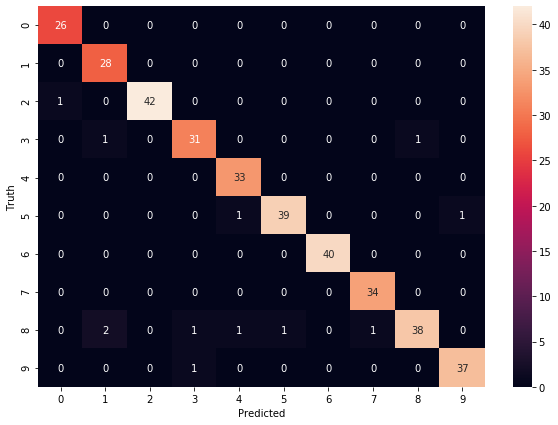

In [53]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## K Fold Cross Validation

In [54]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(digit_X_train, digit_y_train)
lr.score(digit_X_test, digit_y_test)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9611111111111111

In [55]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(digit_X_train, digit_y_train)
svm.score(digit_X_test, digit_y_test)

1.0

In [57]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [59]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print (train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


In [60]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [61]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 3)

In [68]:
scores_lr=[]
scores_svm=[]
scores_rf=[]

for train_index, test_index in folds.split(digits.data, digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], digits.target[train_index], digits.target[test_index]
    scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

In [70]:
scores_lr

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]

In [71]:
scores_svm

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [72]:
scores_rf

[0.9315525876460768, 0.9398998330550918, 0.9282136894824707]

In [73]:
from sklearn.model_selection import cross_val_score

In [74]:
cross_val_score(LogisticRegression(), digits.data, digits.target)

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [75]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [77]:
cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target)

array([0.93055556, 0.9       , 0.95543175, 0.9637883 , 0.91922006])

In [79]:
cross_val_score(RandomForestClassifier(n_estimators=50), digits.data, digits.target)

array([0.92777778, 0.89166667, 0.95821727, 0.9637883 , 0.92479109])